In [12]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout,MaxPool2D,Conv2D
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/archive (7)/Data'
classes = os.listdir(path)
print(classes)

['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']


In [4]:
def preprocess(img_path):
    try:
        # Attempt to read the image
        image = cv2.imread(img_path)

        # Check if the image is empty
        if image is None:
            raise Exception(f"Error: Unable to read image at {img_path}")

        # Resize the image
        img = cv2.resize(image, (224, 224),interpolation=cv2.INTER_AREA)  # Adjust the target size as needed

        # Convert to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        return img

    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return None  # Return None in case of an error

In [6]:
img = []
label = []
# encoder = LabelEncoder()
# encoder.fit(classes)
for class_label in classes:
  class_path = os.path.join(path,class_label)
  i = 0

  for filename in (os.listdir(class_path)):
    img_path = os.path.join(class_path,filename)
    image = preprocess(img_path)
    img.append(image)
    label.append(class_label)
    i+=1
    if i == 1000:
      break
# actual_label = label
# labels_encoded = encoder.transform(label)
# images = np.array(img)
# labels = np.array(labels_encoded)
# mapping = {encoded : label for encoded,label in zip(labels_encoded,actual_label)}
# print(mapping)

actual_label = label
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(actual_label)
images = np.array(img)
labels = np.array(labels_encoded)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'Mild Dementia': 0, 'Moderate Dementia': 1, 'Non Demented': 2, 'Very mild Dementia': 3}


In [7]:
images.shape

(3538, 224, 224)

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(images,labels,random_state = 28,shuffle = True,test_size=0.25)

In [9]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((2653, 224, 224), (2653,), (885, 224, 224), (885,))

In [10]:

model = Sequential()

model.add(Conv2D(32,kernel_size = 3,padding = 'same',activation='relu',input_shape = (224,224,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Conv2D(64,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2),strides = (2,2)))

model.add(Conv2D(128,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Conv2D(128,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation = 'softmax'))
model.compile(optimizer = 'adamax',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])



In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
84/84 [==============================] - 22s 183ms/step - loss: 5.6893 - accuracy: 0.5958 - val_loss: 0.5486 - val_accuracy: 0.8131
Epoch 2/20
84/84 [==============================] - 12s 141ms/step - loss: 0.3811 - accuracy: 0.8497 - val_loss: 0.2901 - val_accuracy: 0.9043
Epoch 3/20
84/84 [==============================] - 12s 140ms/step - loss: 0.2311 - accuracy: 0.9042 - val_loss: 0.2918 - val_accuracy: 0.8660
Epoch 4/20
84/84 [==============================] - 12s 139ms/step - loss: 0.1955 - accuracy: 0.9185 - val_loss: 0.1921 - val_accuracy: 0.9088
Epoch 5/20
84/84 [==============================] - 12s 139ms/step - loss: 0.1687 - accuracy: 0.9249 - val_loss: 0.1770 - val_accuracy: 0.9099
Epoch 6/20
84/84 [==============================] - 12s 139ms/step - loss: 0.1568 - accuracy: 0.9275 - val_loss: 0.1718 - val_accuracy: 0.9077
Epoch 7/20
84/84 [==============================] - 12s 139ms/step - loss: 0.1480 - accuracy: 0.9279 - val_loss: 0.1644 - val_accuracy: 0.9110

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

28/28 [==============================] - 1s 23ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
accuracy_score(ytest,ypred)

0.2702702702702703

In [ ]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

{2: 'Non Demented', 3: 'Very mild Dementia', 1: 'Moderate Dementia', 0: 'Mild Dementia'}

#AlexNet

In [ ]:
model = Sequential()

# Block 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

# Block 2
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

# Block 3
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1000, activation='softmax'))  # Change 1000 to the number of classes in your task

model.summary()  # Display model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        11712     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 384)      

In [ ]:
model.compile(optimizer = 'adamax',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
84/84 [==============================] - 423s 5s/step - loss: 6.5164 - accuracy: 0.4027 - val_loss: 1.0128 - val_accuracy: 0.6002
Epoch 2/20
84/84 [==============================] - 414s 5s/step - loss: 0.7467 - accuracy: 0.6953 - val_loss: 0.4876 - val_accuracy: 0.8063
Epoch 3/20
84/84 [==============================] - 451s 5s/step - loss: 0.3365 - accuracy: 0.8832 - val_loss: 0.3564 - val_accuracy: 0.8525
Epoch 4/20
84/84 [==============================] - 474s 6s/step - loss: 0.1634 - accuracy: 0.9467 - val_loss: 0.1334 - val_accuracy: 0.9538
Epoch 5/20
84/84 [==============================] - 454s 5s/step - loss: 0.0610 - accuracy: 0.9816 - val_loss: 0.0708 - val_accuracy: 0.9842
Epoch 6/20
84/84 [==============================] - 465s 6s/step - loss: 0.0519 - accuracy: 0.9812 - val_loss: 0.0488 - val_accuracy: 0.9865
Epoch 7/20
84/84 [==============================] - 476s 6s/step - loss: 0.0450 - accuracy: 0.9846 - val_loss: 0.0798 - val_accuracy: 0.9899
Epoch 8/20
84

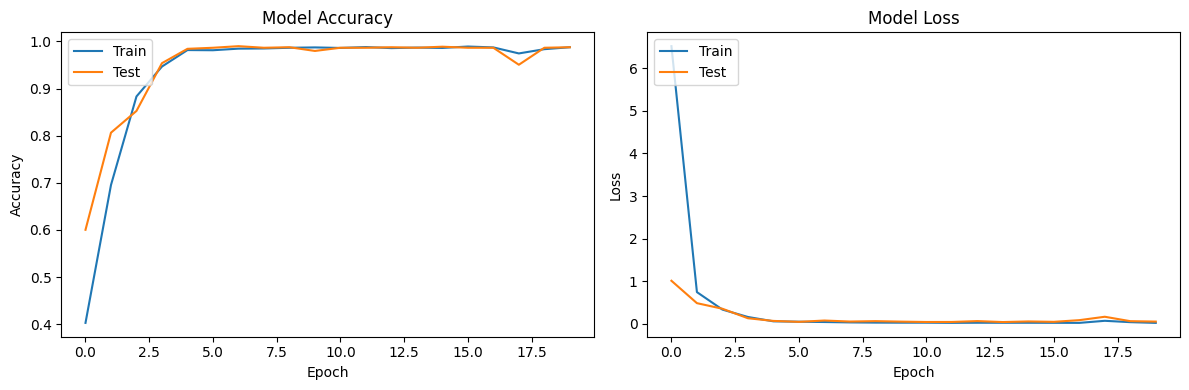

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

28/28 [==============================] - 29s 1s/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
accuracy_score(ytest,ypred)

0.9876126126126126

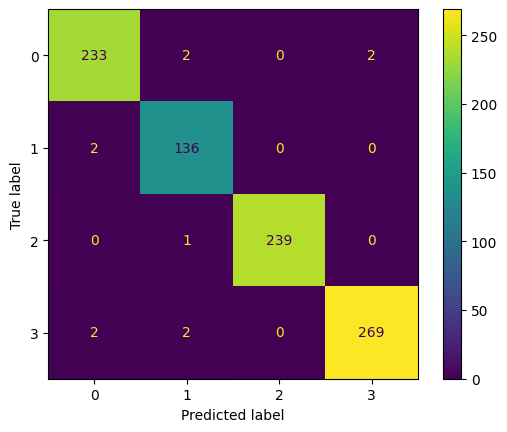

In [ ]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

#ResNet-18

In [ ]:
from keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input
from keras.models import Model
from keras.utils import to_categorical



def conv_block(input_tensor, filters, kernel_size, strides=(1, 1), padding='same'):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def identity_block(input_tensor, filters, kernel_size, strides=(1, 1), padding='same'):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding=padding)(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

def ResNet18(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    x = conv_block(input_img, 64, (7, 7), strides=(2, 2), padding='same')
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(x, 64, (3, 3))
    x = identity_block(x, 64, (3, 3))
    x = identity_block(x, 64, (3, 3))

    x = conv_block(x, 128, (3, 3), strides=(2, 2), padding='same')
    x = identity_block(x, 128, (3, 3))
    x = identity_block(x, 128, (3, 3))

    x = conv_block(x, 256, (3, 3), strides=(2, 2), padding='same')
    x = identity_block(x, 256, (3, 3))
    x = identity_block(x, 256, (3, 3))

    x = conv_block(x, 512, (3, 3), strides=(2, 2), padding='same')
    x = identity_block(x, 512, (3, 3))
    x = identity_block(x, 512, (3, 3))

    x = AveragePooling2D((7, 7), name='avg_pool')(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='resnet18')
    return model

# Create ResNet-18 model with input shape (224, 224, 1)
resnet_model = ResNet18(input_shape=(224, 224, 1))
resnet_model.summary()


# Create ResNet-18 model
model = ResNet18()
model.summary()


Model: "resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_505 (Conv2D)         (None, 112, 112, 64)         3200      ['input_25[0][0]']            
                                                                                                  
 batch_normalization_126 (B  (None, 112, 112, 64)         256       ['conv2d_505[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_128 (Activation  (None, 112, 112, 64)         0         ['batch_normalization_1

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define ResNet-18 model
model = ResNet18()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
84/84 [==============================] - 24s 145ms/step - loss: 1.1524 - accuracy: 0.6262 - val_loss: 43.6870 - val_accuracy: 0.2703
Epoch 2/20
84/84 [==============================] - 11s 137ms/step - loss: 0.5194 - accuracy: 0.8035 - val_loss: 9.4320 - val_accuracy: 0.2703
Epoch 3/20
84/84 [==============================] - 11s 137ms/step - loss: 0.3431 - accuracy: 0.8663 - val_loss: 3.0908 - val_accuracy: 0.5000
Epoch 4/20
84/84 [==============================] - 11s 132ms/step - loss: 0.2624 - accuracy: 0.8907 - val_loss: 0.7509 - val_accuracy: 0.7173
Epoch 5/20
84/84 [==============================] - 12s 139ms/step - loss: 0.2705 - accuracy: 0.8850 - val_loss: 1.8457 - val_accuracy: 0.5518
Epoch 6/20
84/84 [==============================] - 11s 136ms/step - loss: 0.1982 - accuracy: 0.9087 - val_loss: 0.7827 - val_accuracy: 0.7455
Epoch 7/20
84/84 [==============================] - 11s 134ms/step - loss: 0.2344 - accuracy: 0.8989 - val_loss: 0.5039 - val_accuracy: 0.797

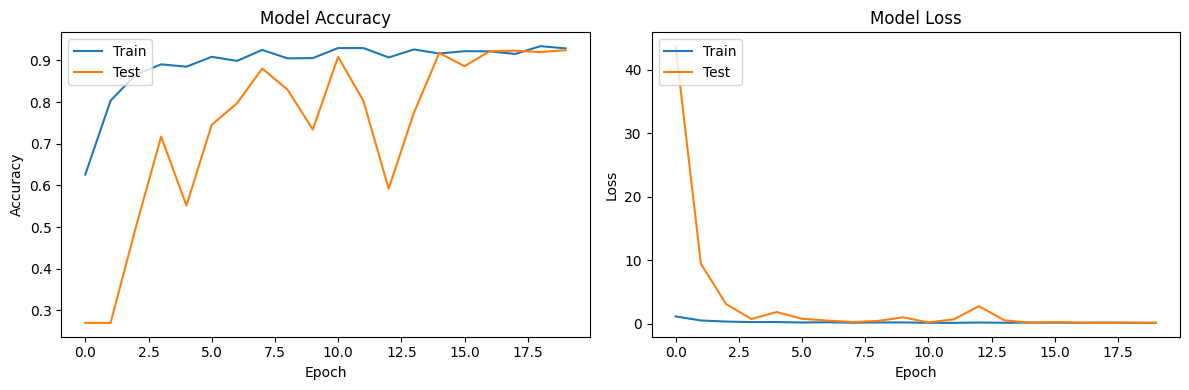

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

28/28 [==============================] - 1s 35ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
accuracy_score(ytest,ypred)

0.9245495495495496

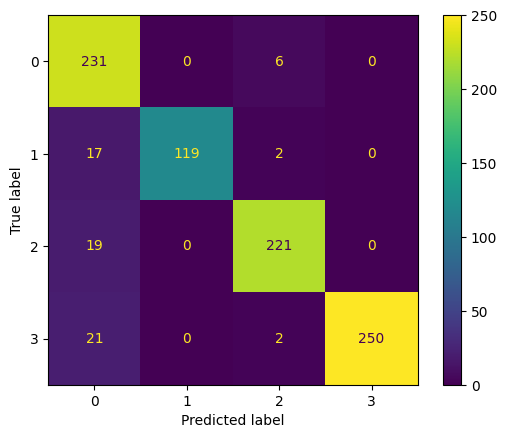

In [ ]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

#GoogLe Net

In [ ]:
import tensorflow
from keras import layers, models
from keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, Concatenate

from keras.models import Model
from keras.utils import to_categorical


def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    return output

def GoogLeNet(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    # First Convolutional Layer
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_img)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Second Convolutional Layer
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception Modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)

    # Average Pooling and Dropout
    x = AveragePooling2D((7, 7))(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)

    # Output Layer
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='googlenet')
    return model

# Create GoogLeNet model with input shape (224, 224, 1)
googlenet_model = GoogLeNet(input_shape=(224, 224, 1))
googlenet_model.summary()


Model: "googlenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_228 (Conv2D)         (None, 112, 112, 64)         3200      ['input_15[0][0]']            
                                                                                                  
 max_pooling2d_50 (MaxPooli  (None, 56, 56, 64)           0         ['conv2d_228[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 conv2d_229 (Conv2D)         (None, 56, 56, 64)           4160      ['max_pooling2d_50[0][

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define GoogLe Net model
model = GoogLeNet()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
84/84 [==============================] - 46s 220ms/step - loss: 1.7264 - accuracy: 0.2746 - val_loss: 1.4022 - val_accuracy: 0.2703
Epoch 2/20
84/84 [==============================] - 10s 113ms/step - loss: 1.3901 - accuracy: 0.2814 - val_loss: 1.2283 - val_accuracy: 0.4009
Epoch 3/20
84/84 [==============================] - 9s 106ms/step - loss: 1.2670 - accuracy: 0.3888 - val_loss: 1.1751 - val_accuracy: 0.4234
Epoch 4/20
84/84 [==============================] - 9s 108ms/step - loss: 1.1607 - accuracy: 0.4602 - val_loss: 1.1634 - val_accuracy: 0.4212
Epoch 5/20
84/84 [==============================] - 9s 111ms/step - loss: 1.0179 - accuracy: 0.5331 - val_loss: 0.9767 - val_accuracy: 0.5507
Epoch 6/20
84/84 [==============================] - 9s 105ms/step - loss: 0.9516 - accuracy: 0.5657 - val_loss: 0.9547 - val_accuracy: 0.5777
Epoch 7/20
84/84 [==============================] - 9s 112ms/step - loss: 0.8787 - accuracy: 0.5988 - val_loss: 0.8849 - val_accuracy: 0.6250
Epoc

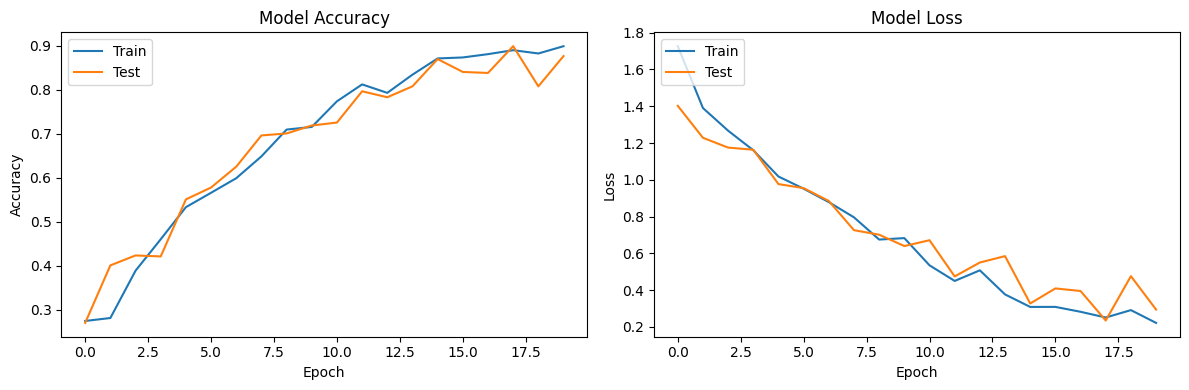

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

28/28 [==============================] - 1s 30ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

0.8761261261261262

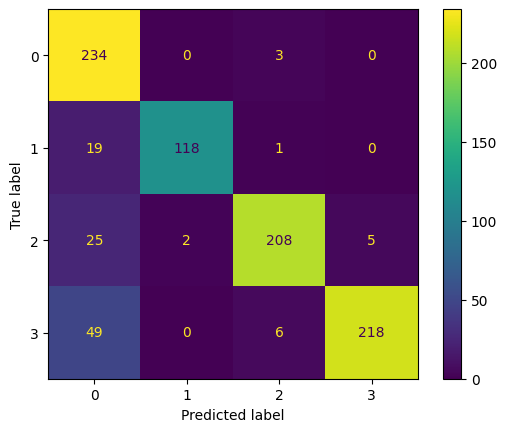

In [ ]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

#VGG-16

In [61]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

def VGG16(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='vgg16')
    return model

# Create VGG-16 model with input shape (224, 224, 1)
vgg16_model = VGG16(input_shape=(224, 224, 1))
vgg16_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_222 (Conv2D)         (None, 224, 224, 64)      640       
                                                                 
 conv2d_223 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_224 (Conv2D)         (None, 112, 112, 128)     73856     
                                                                 
 conv2d_225 (Conv2D)         (None, 112, 112, 128)     147584    
                                                             

In [62]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define VGG-16 model
model = VGG16()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [1]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

NameError: name 'model' is not defined

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

In [ ]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

#VGG-19

In [59]:
import tensorflow
from keras import layers, models
from keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, Concatenate

from keras.models import Model
from keras.utils import to_categorical


def VGG19(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='vgg19')
    return model

# Create VGG-19 model with input shape (224, 224, 1)
vgg19_model = VGG19(input_shape=(224, 224, 1))
vgg19_model.summary()


In [51]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define VGG-19 model
model = VGG19()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [52]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
83/83 [==============================] - 88s 789ms/step - loss: 218.0893 - accuracy: 0.2601 - val_loss: 1.3548 - val_accuracy: 0.2667
Epoch 2/20
83/83 [==============================] - 42s 511ms/step - loss: 1.3716 - accuracy: 0.2831 - val_loss: 1.3552 - val_accuracy: 0.3017
Epoch 3/20
83/83 [==============================] - 43s 516ms/step - loss: 1.3692 - accuracy: 0.2895 - val_loss: 1.3635 - val_accuracy: 0.2949
Epoch 4/20
83/83 [==============================] - 43s 522ms/step - loss: 1.3787 - accuracy: 0.2665 - val_loss: 1.3560 - val_accuracy: 0.2949
Epoch 5/20
83/83 [==============================] - 44s 526ms/step - loss: 1.3690 - accuracy: 0.2910 - val_loss: 1.3603 - val_accuracy: 0.3842
Epoch 6/20
83/83 [==============================] - 44s 529ms/step - loss: 1.2507 - accuracy: 0.4222 - val_loss: 1.4236 - val_accuracy: 0.3141
Epoch 7/20
83/83 [==============================] - 44s 531ms/step - loss: 1.2151 - accuracy: 0.4433 - val_loss: 1.0814 - val_accuracy: 0.50

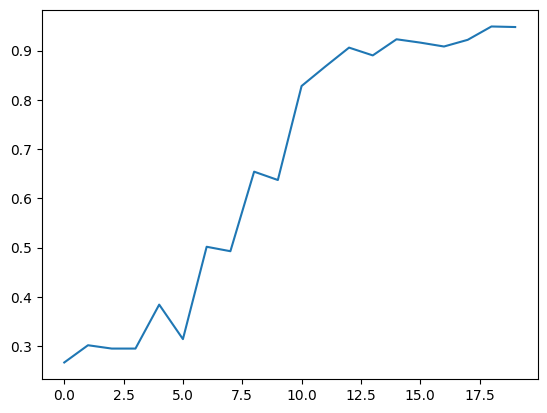

In [53]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [54]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

In [55]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [56]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(ytest,ypred)

0.9480225988700565

In [58]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

#Inception V3

In [41]:
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, AveragePooling2D, Flatten, Dense
from keras.models import Model

def InceptionV3(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    # Stem
    x = Conv2D(32, (3, 3), strides=(2, 2), activation='relu', padding='valid')(input_img)
    x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Inception blocks
    x = inception_block(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_block(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Add more inception blocks here...

    # Classification head
    x = AveragePooling2D((4, 4))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='inceptionv3')
    return model

def inception_block(x, filters):
    """
    Creates an Inception block with parallel convolutions.
    """
    branch1x1 = Conv2D(filters[0], (1, 1), activation='relu')(x)

    branch3x3 = Conv2D(filters[1], (1, 1), activation='relu')(x)
    branch3x3 = Conv2D(filters[2], (3, 3), activation='relu', padding='same')(branch3x3)

    branch5x5 = Conv2D(filters[3], (1, 1), activation='relu')(x)
    branch5x5 = Conv2D(filters[4], (5, 5), activation='relu', padding='same')(branch5x5)

    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters[5], (1, 1), activation='relu')(branch_pool)

    return concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)

# Create InceptionV3 model with input shape (224, 224, 1)
inceptionv3_model = InceptionV3(input_shape=(224, 224, 1))
inceptionv3_model.summary()


Model: "inceptionv3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_160 (Conv2D)         (None, 111, 111, 32)         320       ['input_9[0][0]']             
                                                                                                  
 conv2d_161 (Conv2D)         (None, 109, 109, 32)         9248      ['conv2d_160[0][0]']          
                                                                                                  
 conv2d_162 (Conv2D)         (None, 109, 109, 64)         18496     ['conv2d_161[0][0]']          
                                                                                        

In [42]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define VGG-19 model
model = InceptionV3()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [43]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
83/83 [==============================] - 29s 210ms/step - loss: 1.9974 - accuracy: 0.5530 - val_loss: 0.7360 - val_accuracy: 0.7028
Epoch 2/20
83/83 [==============================] - 11s 130ms/step - loss: 0.4504 - accuracy: 0.8462 - val_loss: 0.3361 - val_accuracy: 0.8836
Epoch 3/20
83/83 [==============================] - 11s 131ms/step - loss: 0.2347 - accuracy: 0.9205 - val_loss: 0.1839 - val_accuracy: 0.9288
Epoch 4/20
83/83 [==============================] - 11s 131ms/step - loss: 0.1629 - accuracy: 0.9404 - val_loss: 0.1628 - val_accuracy: 0.9390
Epoch 5/20
83/83 [==============================] - 11s 131ms/step - loss: 0.1301 - accuracy: 0.9484 - val_loss: 0.1511 - val_accuracy: 0.9367
Epoch 6/20
83/83 [==============================] - 10s 126ms/step - loss: 0.1450 - accuracy: 0.9389 - val_loss: 0.1865 - val_accuracy: 0.9209
Epoch 7/20
83/83 [==============================] - 11s 127ms/step - loss: 0.1162 - accuracy: 0.9544 - val_loss: 0.1436 - val_accuracy: 0.9525

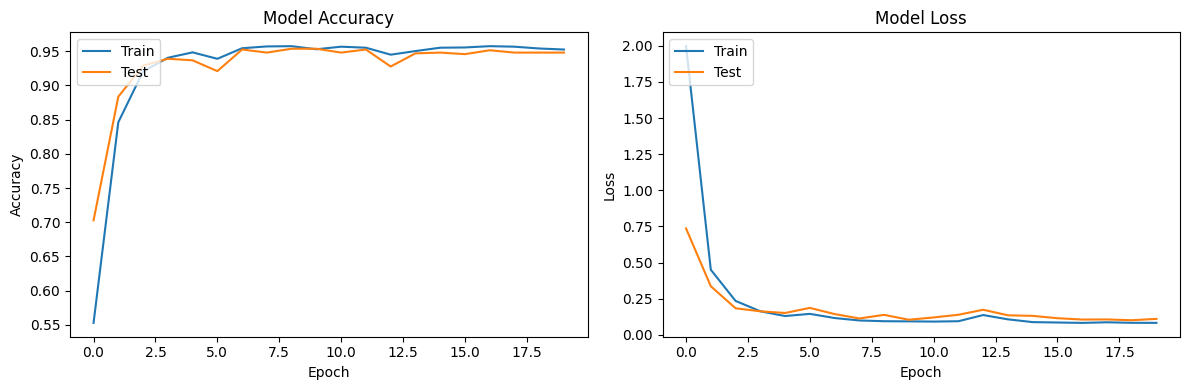

In [44]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [45]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

28/28 [==============================] - 1s 35ms/step


In [46]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [47]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(ytest,ypred)

0.9480225988700565

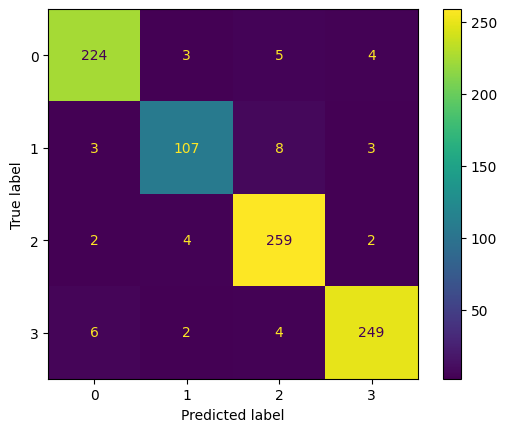

In [49]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

#Squeezenet

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Activation
from keras.models import Model

def SqueezeNet(input_shape=(224, 224, 1), num_classes=1000):
    input_img = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(64, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_img)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Fire modules
    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=16, expand=64)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = fire_module(x, squeeze=32, expand=128)
    x = fire_module(x, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=64, expand=256)
    x = fire_module(x, squeeze=64, expand=256)

    # Classification head
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)
    x = AveragePooling2D(pool_size=(13, 13))(x)
    x = Flatten()(x)
    x = Activation('softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='squeezenet')
    return model

def fire_module(x, squeeze, expand):
    """
    Creates a Fire module consisting of squeeze and expand layers.
    """
    squeezed = Conv2D(squeeze, (1, 1), activation='relu', padding='valid')(x)

    expanded_1x1 = Conv2D(expand, (1, 1), activation='relu', padding='valid')(squeezed)
    expanded_3x3 = Conv2D(expand, (3, 3), activation='relu', padding='same')(squeezed)

    output = concatenate([expanded_1x1, expanded_3x3], axis=-1)
    return output

# Create SqueezeNet model with input shape (224, 224, 1)
squeezenet_model = SqueezeNet(input_shape=(224, 224, 1))
squeezenet_model.summary()


Model: "squeezenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_150 (Conv2D)         (None, 111, 111, 64)         640       ['input_11[0][0]']            
                                                                                                  
 max_pooling2d_34 (MaxPooli  (None, 55, 55, 64)           0         ['conv2d_150[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 conv2d_151 (Conv2D)         (None, 55, 55, 16)           1040      ['max_pooling2d_34[0]

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define SqueezeNet model
model = SqueezeNet()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
84/84 [==============================] - 5s 56ms/step - loss: 1.1612 - accuracy: 0.4872 - val_loss: 1.2846 - val_accuracy: 0.4133
Epoch 2/20
84/84 [==============================] - 4s 52ms/step - loss: 1.0797 - accuracy: 0.5184 - val_loss: 1.0725 - val_accuracy: 0.4752
Epoch 3/20
84/84 [==============================] - 4s 52ms/step - loss: 0.9585 - accuracy: 0.5770 - val_loss: 0.9770 - val_accuracy: 0.6160
Epoch 4/20
84/84 [==============================] - 4s 53ms/step - loss: 0.8284 - accuracy: 0.6461 - val_loss: 0.8376 - val_accuracy: 0.6509
Epoch 5/20
84/84 [==============================] - 4s 51ms/step - loss: 0.7420 - accuracy: 0.6818 - val_loss: 0.7198 - val_accuracy: 0.6993
Epoch 6/20
84/84 [==============================] - 5s 62ms/step - loss: 0.6403 - accuracy: 0.7509 - val_loss: 0.6822 - val_accuracy: 0.6982
Epoch 7/20
84/84 [==============================] - 4s 50ms/step - loss: 0.5202 - accuracy: 0.7964 - val_loss: 0.5239 - val_accuracy: 0.7962
Epoch 8/20
84

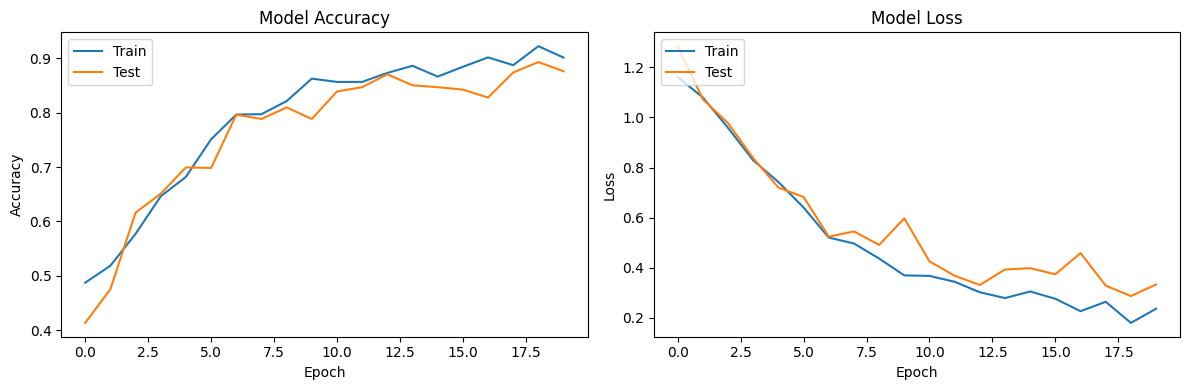

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

28/28 [==============================] - 1s 16ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

0.8761261261261262

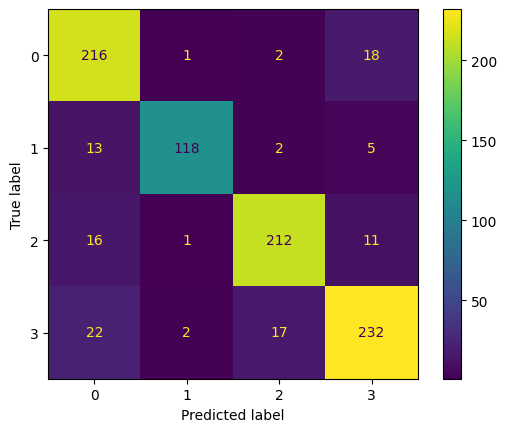

In [ ]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

Text(0.5, 1.0, 'Model Accuracy Comparison')

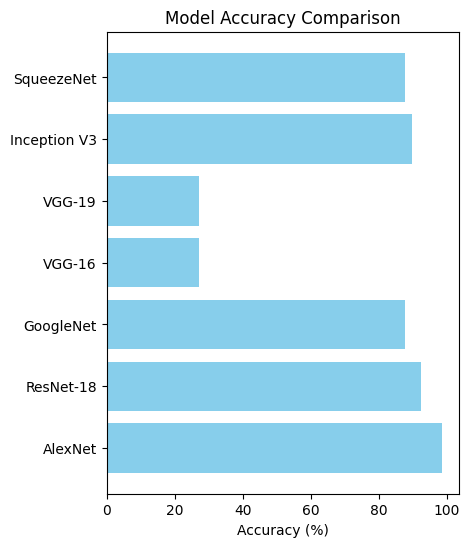

In [ ]:
import matplotlib.pyplot as plt

# Models
models = ['AlexNet', 'ResNet-18', 'GoogleNet', 'VGG-16', 'VGG-19', 'Inception V3', 'SqueezeNet']

# Accuracy values
accuracy = [98.7, 92.45, 87.61, 27.02, 27.02, 89.9, 87.612]

# Loss values
loss = [0.0246, 0.1374, 0.222, 1.6368, 1.362, 0.257, 0.236]

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.barh(models, accuracy, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Loss plot



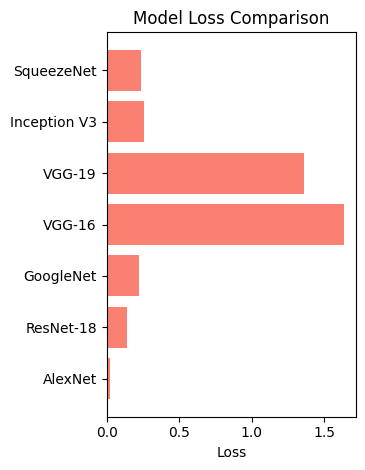

In [ ]:
plt.subplot(1, 2, 2)
plt.barh(models, loss, color='salmon')
plt.xlabel('Loss')
plt.title('Model Loss Comparison')

plt.tight_layout()
plt.show()

##DenseNet

In [24]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.layers import GlobalAveragePooling2D, Reshape, Multiply, Add
from keras import backend as K

def squeeze_excite_block(inputs, ratio=16):
    channels = K.int_shape(inputs)[-1]

    # Squeeze operation
    se = GlobalAveragePooling2D()(inputs)
    se = Dense(channels // ratio, activation='relu')(se)
    se = Dense(channels, activation='sigmoid')(se)
    se = Reshape((1, 1, channels))(se)  # Reshape to match input shape

    # Excitation operation
    x = Multiply()([inputs, se])
    return x

def conv_block(x, filters, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    return x

def se_net(input_shape=(224, 224, 1), num_classes=4):
    inputs = Input(shape=input_shape)

    # Initial convolution block
    x = conv_block(inputs, filters=64, kernel_size=(7, 7), strides=(2, 2))
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Convolution blocks with SE blocks
    filters = 64
    for _ in range(3):
        x = conv_block(x, filters=filters)
        x = squeeze_excite_block(x)
        x = conv_block(x, filters=filters * 2, strides=(2, 2))
        filters *= 2

    # Flatten and fully connected layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Define input shape and number of classes
input_shape = (224, 224, 1)  # Change this to match your input shape
num_classes = 4  # Change this to match your number of classes

# Create SENet model
model = se_net(input_shape=input_shape, num_classes=num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()  # Print model summary


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_82 (Conv2D)          (None, 112, 112, 64)         3200      ['input_7[0][0]']             
                                                                                                  
 batch_normalization_77 (Ba  (None, 112, 112, 64)         256       ['conv2d_82[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_2 (Activation)   (None, 112, 112, 64)         0         ['batch_normalization_77

In [25]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
83/83 [==============================] - 15s 87ms/step - loss: 0.5623 - accuracy: 0.7931 - val_loss: 1.3541 - val_accuracy: 0.2667
Epoch 2/20
83/83 [==============================] - 4s 52ms/step - loss: 0.1677 - accuracy: 0.9355 - val_loss: 1.3308 - val_accuracy: 0.5311
Epoch 3/20
83/83 [==============================] - 4s 53ms/step - loss: 0.1643 - accuracy: 0.9355 - val_loss: 1.1573 - val_accuracy: 0.4723
Epoch 4/20
83/83 [==============================] - 5s 58ms/step - loss: 0.1361 - accuracy: 0.9420 - val_loss: 16.6280 - val_accuracy: 0.2678
Epoch 5/20
83/83 [==============================] - 4s 53ms/step - loss: 0.1278 - accuracy: 0.9423 - val_loss: 0.3225 - val_accuracy: 0.8893
Epoch 6/20
83/83 [==============================] - 5s 55ms/step - loss: 0.1019 - accuracy: 0.9469 - val_loss: 4.9266 - val_accuracy: 0.3910
Epoch 7/20
83/83 [==============================] - 5s 59ms/step - loss: 0.1083 - accuracy: 0.9491 - val_loss: 11.6466 - val_accuracy: 0.2983
Epoch 8/20

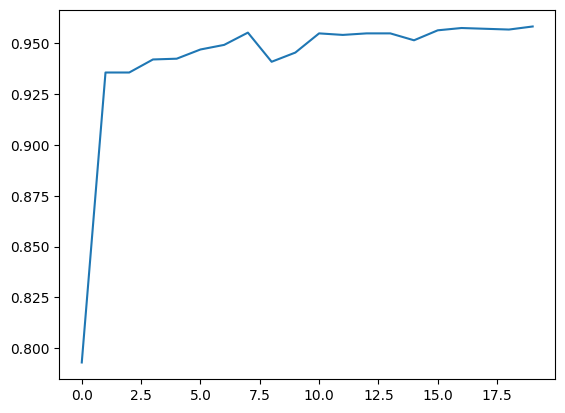

In [26]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [28]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

28/28 [==============================] - 1s 16ms/step


In [29]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(ytest,ypred)

0.9536723163841808

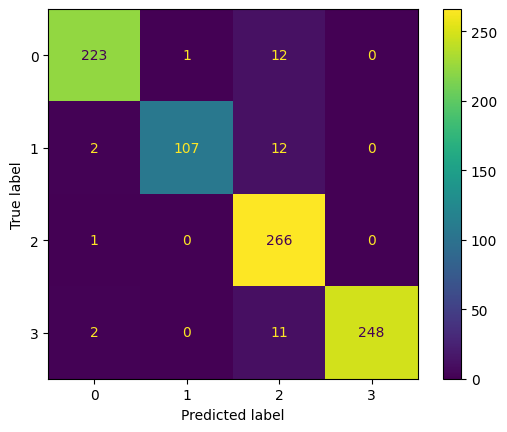

In [32]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()

##Xception

In [33]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, concatenate

def dense_block(x, growth_rate, num_layers):
    for _ in range(num_layers):
        x1 = BatchNormalization()(x)
        x1 = Conv2D(growth_rate, kernel_size=(3,3), padding='same', activation='relu')(x1)
        x = concatenate([x, x1], axis=-1)
    return x

def transition_layer(x, compression_factor):
    num_channels = int(x.shape[-1])
    num_channels = int(num_channels * compression_factor)
    x = BatchNormalization()(x)
    x = Conv2D(num_channels, kernel_size=(1,1), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)
    return x

input_shape = (224, 224, 1)  # Change this to match your input shape
num_classes = 4  # Change this to match your number of classes

input_layer = Input(shape=input_shape)

# Initial convolution block
x = Conv2D(64, kernel_size=(7,7), strides=(2,2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

# Dense blocks and transition layers
growth_rate = 32  # Hyperparameter, you can adjust this
num_layers = [6, 12, 24, 16]  # Number of layers in each dense block
compression_factor = 0.5  # Hyperparameter, you can adjust this

for num_layer in num_layers:
    x = dense_block(x, growth_rate, num_layer)
    x = transition_layer(x, compression_factor)

# Final dense block
x = dense_block(x, growth_rate, 8)  # Adjust the number of layers as needed

# Classification head
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()  # Print model summary


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_89 (Conv2D)          (None, 112, 112, 64)         3200      ['input_8[0][0]']             
                                                                                                  
 max_pooling2d_10 (MaxPooli  (None, 56, 56, 64)           0         ['conv2d_89[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 56, 56, 64)           256       ['max_pooling2d_10[0][0]

In [34]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
83/83 [==============================] - 67s 297ms/step - loss: 1.0704 - accuracy: 0.7071 - val_loss: 37.3164 - val_accuracy: 0.2960
Epoch 2/20
83/83 [==============================] - 24s 290ms/step - loss: 0.3083 - accuracy: 0.8911 - val_loss: 3.4137 - val_accuracy: 0.3944
Epoch 3/20
83/83 [==============================] - 24s 290ms/step - loss: 0.2292 - accuracy: 0.9224 - val_loss: 2.4044 - val_accuracy: 0.4610
Epoch 4/20
83/83 [==============================] - 24s 292ms/step - loss: 0.2682 - accuracy: 0.9084 - val_loss: 10.6263 - val_accuracy: 0.3480
Epoch 5/20
83/83 [==============================] - 24s 294ms/step - loss: 0.1431 - accuracy: 0.9386 - val_loss: 0.0852 - val_accuracy: 0.9559
Epoch 6/20
83/83 [==============================] - 24s 290ms/step - loss: 0.0992 - accuracy: 0.9544 - val_loss: 0.3881 - val_accuracy: 0.8757
Epoch 7/20
83/83 [==============================] - 24s 290ms/step - loss: 0.1298 - accuracy: 0.9412 - val_loss: 6.6545 - val_accuracy: 0.45

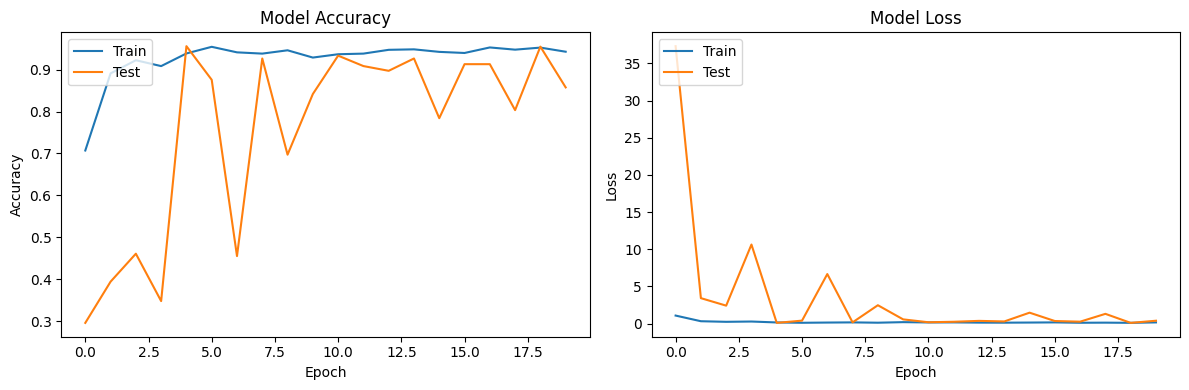

In [35]:
import matplotlib.pyplot as plt

def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [36]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

28/28 [==============================] - 3s 77ms/step


In [37]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(ytest,ypred)

0.8576271186440678

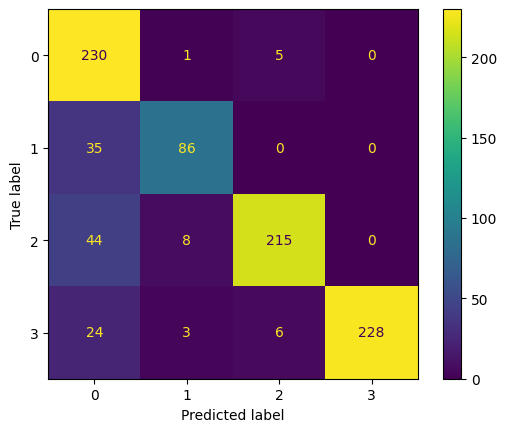

In [40]:
cf = confusion_matrix(y_true = ytest ,y_pred =  ypred)
x = ConfusionMatrixDisplay(cf)
x.plot()